# Data Preprocessing

## Import Libraries

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
from matplotlib import pyplot as plt

## Import Dataset

In [41]:
users = pd.read_csv('./CSVs/BX-Users.csv', error_bad_lines=False, sep=';', encoding="latin1")

In [3]:
books = pd.read_csv('./CSVs/BX-Books.csv', error_bad_lines=False, sep=';', encoding="latin1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
c:\users\asreno\appdata\local\programs\python\python39\lib\site-packages\I

In [4]:
ratings = pd.read_csv('./CSVs/BX-Book-Ratings.csv', error_bad_lines=False, sep=';', encoding="latin1")

In [5]:
print('The shape of Ratings is: ' + str(ratings.shape))
print('The shape of Users is: ' + str(users.shape))
print('The shape of Books is: ' + str(books.shape))

The shape of Ratings is: (1149780, 3)
The shape of Users is: (278858, 3)
The shape of Books is: (271360, 8)


## Data Preprocessing

### Users DataFrame

In [42]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [43]:
users.columns = ['userId', 'location', 'age']

<AxesSubplot:>

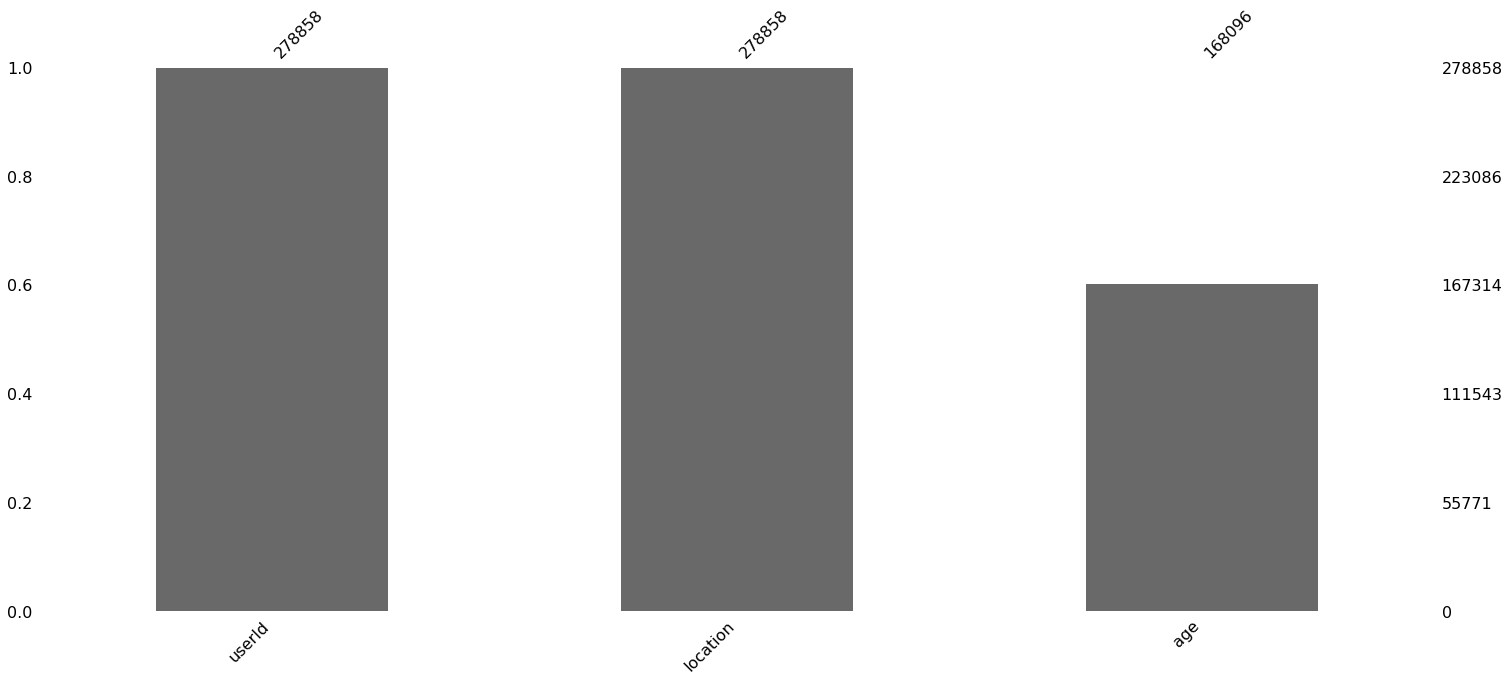

In [44]:
import missingno as msno
msno.bar(users)

In [46]:
users.age = users.age.astype(float)
print("Users with age < 5: ", users.loc[users.age<5,'age'].count())
print("Users with age > 110: ", users.loc[users.age > 110,'age'].count())
users.loc[users.age < 5,'age'] = np.nan
users.loc[users.age > 110,'age'] = np.nan

Users with age < 5:  882
Users with age > 110:  96


In [47]:
temp_age_series = pd.Series(np.random.normal(loc=users.age.mean(), scale=users.age.std(), size=users.userId[users.age.isna()]
                                             .count()))
print("Statistics of values in \'users.age\'\n",users.age.describe(),"\n")
print("Statistics of values we are going to use to fill NaN \n",temp_age_series.describe(),"\n")
print("Negative values in \'temp_age_seires\':", temp_age_series[temp_age_series<0].count(),"\n")
print("As we can see the destribution doesnt change a lot. There are some negative values thought.\n")

# print()

# take the abs value of temp_age_series
pos_age_series = np.abs(temp_age_series)

# sort users Df so as NaN values in age to be first and reset index to match with index of pos_age_series. Then use fillna()
users = users.sort_values('age',na_position='first').reset_index(drop=True)
users.age.fillna(pos_age_series, inplace = True)  

# replace values < 5 with the mean(). Round values and convert them to int. 
users.loc[users.age<5, 'age'] = users.age.mean()
users.age = users.age.round().astype(int)
#Sort users based on user_id so as to be the same as before
users = users.sort_values('userId').reset_index(drop=True)
print(users.age.describe(),"\n")

Statistics of values in 'users.age'
 count    167118.000000
mean         34.858244
std          13.901748
min           5.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         110.000000
Name: age, dtype: float64 

Statistics of values we are going to use to fill NaN 
 count    111740.000000
mean         34.896935
std          13.909485
min         -23.564983
25%          25.575341
50%          34.859853
75%          44.259022
max          95.543837
dtype: float64 

Negative values in 'temp_age_seires': 672 

As we can see the destribution doesnt change a lot. There are some negative values thought.

count    278858.000000
mean         35.075978
std          13.638248
min           5.000000
25%          25.000000
50%          33.000000
75%          44.000000
max         110.000000
Name: age, dtype: float64 



In [48]:
users.age.max()

110

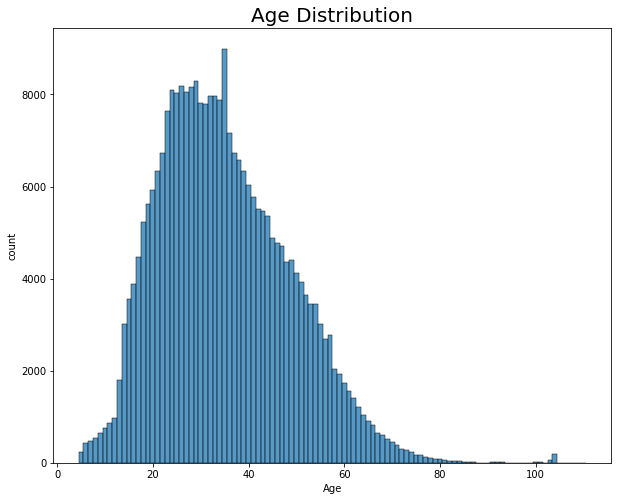

In [68]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.histplot(users['age'], discrete = True)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution',size=20)
plt.show()

In [31]:
user_location_expanded=users.location.str.split(', ', n=2, expand=True)
user_location_expanded.columns=['city', 'state', 'country']
users = users.join(user_location_expanded)
users.drop(columns=['location'], inplace=True)
users.loc[users.state==',', ['state', 'country']] = 'other'
users.loc[users.country==',', ['country']] = 'other'
users.loc[(users.state=='\\n/a\\"') | (users.state=='') | (users.state=='*') | (users.state=='n.a'), ['state']] = 'n/a'
users.state.fillna('other', inplace=True)
users.fillna('n/a', inplace=True)

In [32]:
users.head()

,userId,age,city,state,country
0,1,38,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,29,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,26,farnborough,hants,united kingdom


### Books DataFrame

### Ratings DataFrame